# Linear regression
 <p>linear regression is about finding the best-fitting straight line through your data points. This line is defined by:</p>

``` y = mx + b ```
Where:

<kbd> y </kbd> is what we're trying to predict
<kbd> x </kbd> is our input feature
<kbd> m </kbd> is the slope (how much y changes when x changes)
<kbd> b </kbd> is the y-intercept (the value of y when x=0)

For multiple features, this expands to:
```y = b₀ + b₁x₁ + b₂x₂ + ... + bₙxₙ```

In [1]:
# let import supportive packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# lets generate some Synthetic housing data because i am very lazy to download it from the kaggle
np.random.seed(42)
house_size = np.random.normal(1500,500,100) # house size in sq foot
house_age = np.random.normal(15,10,100) # hours age in years

#Price is a function of size and age with some noise
house_price = 10_000 + 100 * house_size - 3000 * house_age + np.random.normal(0,25_000,100)

# now the data is ready lets make datafram
housing_data = pd.DataFrame({
    "size" : house_size,
    "age" : house_age,
    "price" : house_price
})

In [3]:
housing_data.head()

,size,age,price
0,1748.357077,0.846293,191241.513921
1,1430.867849,10.793547,134725.757784
2,1823.844269,11.572855,184742.143480
3,2261.514928,6.977227,241564.862198
4,1382.923313,13.387143,73689.168415


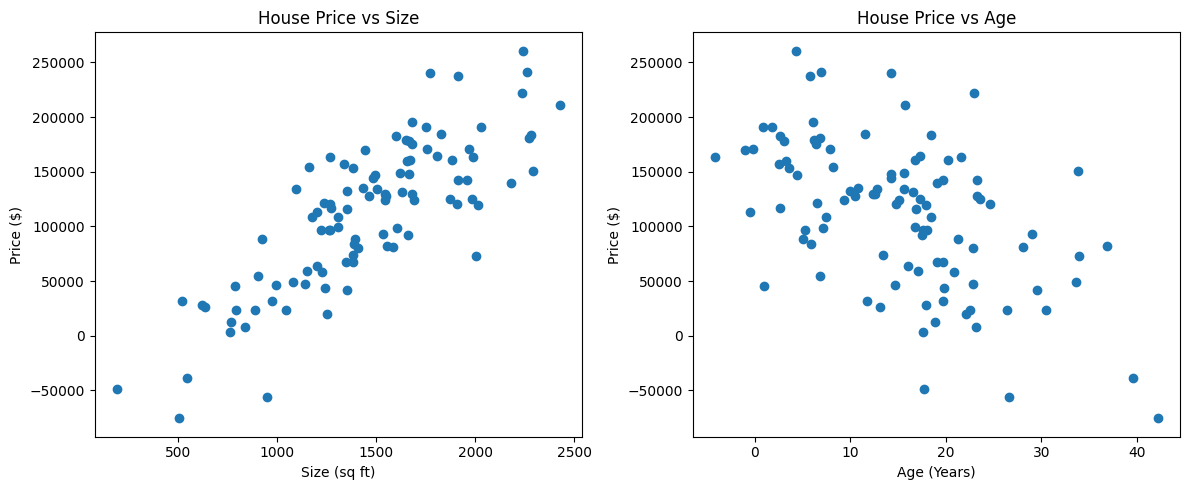

In [5]:
# amm lets get some boring shit done first
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(housing_data['size'], housing_data['price'])
plt.title("House Price vs Size")
plt.xlabel('Size (sq ft)') # which is independent
plt.ylabel('Price ($)') # which is dependent on size

plt.subplot(1,2,2)
plt.scatter(housing_data['age'], housing_data['price'])
plt.title('House Price vs Age')
plt.xlabel('Age (Years)')
plt.ylabel('Price ($)')

plt.tight_layout()
plt.show()

### now its time to extract the features and target

basically features are the columns name on which the target is depends
and the target is the prediction variable

In [8]:
X = housing_data[['size', 'age']]
y = housing_data['price']

#Split into training and testing sets
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

print(f"Training Data shape: {X_train.shape}")
print(f"Testing data shape : {X_test.shape}")

Training Data shape: (80, 2)
Testing data shape : (20, 2)


# Now its time to Train the Model

In [11]:
# initiating model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

#Extract the coefficients
print(f"Intercept: ${model.intercept_:.2f}")
print(f"Size coefficient: ${model.coef_[0]:.2f} per sq ft")
print(f"Age coefficient : ${model.coef_[1]:.2f} per year")

Intercept: $-1789.49
Size coefficient: $108.95 per sq ft
Age coefficient : $-2931.84 per year


In [12]:
# making predictions on test data
y_pred = model.predict(X_test)

# calculate error metric
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: ${mse:.2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: $340560715.02
Root Mean Squared Error: $18454.29
R² Score: 0.9178


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


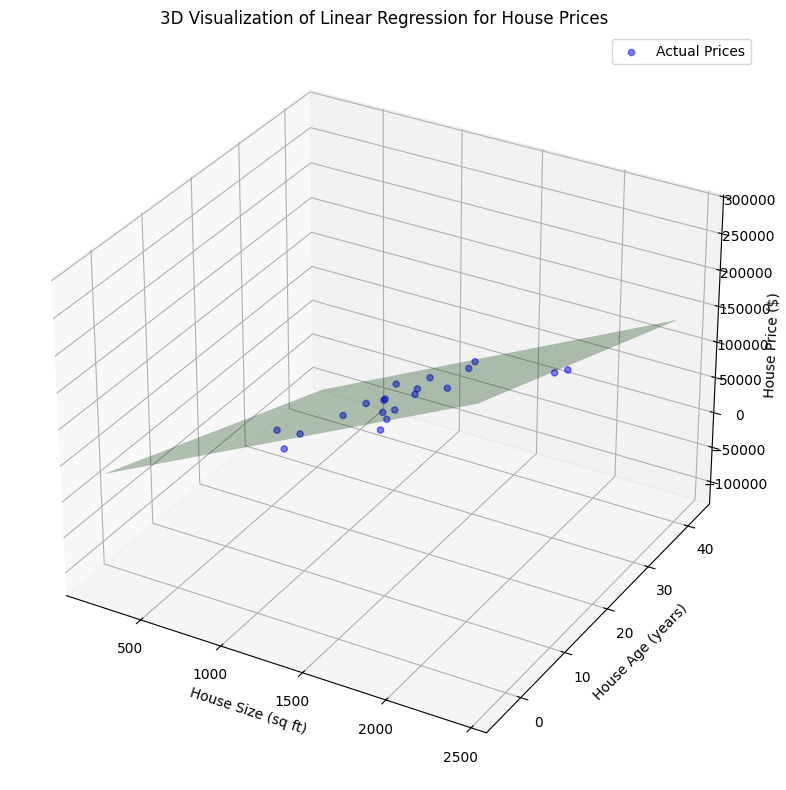

In [13]:
# now its time to visualize the results
# Create a 3D plot to visualize the regression plane
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data
ax.scatter(X_test['size'], X_test['age'], y_test, c='blue', marker='o', alpha=0.5, label='Actual Prices')

# Create a meshgrid for the regression plane
size_range = np.linspace(X['size'].min(), X['size'].max(), 20)
age_range = np.linspace(X['age'].min(), X['age'].max(), 20)
size_mesh, age_mesh = np.meshgrid(size_range, age_range)
points = np.vstack([size_mesh.ravel(), age_mesh.ravel()]).T

# Predict prices for the meshgrid
predicted_prices = model.predict(points)
predicted_mesh = predicted_prices.reshape(size_mesh.shape)

# Plot the regression plane
ax.plot_surface(size_mesh, age_mesh, predicted_mesh, alpha=0.3, color='green')

ax.set_xlabel('House Size (sq ft)')
ax.set_ylabel('House Age (years)')
ax.set_zlabel('House Price ($)')
ax.set_title('3D Visualization of Linear Regression for House Prices')

plt.legend()
plt.tight_layout()
plt.show()